# Relative Cases (Absolute Covid Cases/Population Size)

Roshan Sathyanarayana Shenoy (414583)

## Countries: 

* `Australia`
* `USA`
* `Spain`

In [165]:
import pandas as pd
import requests
import json
import datetime as datetime
import matplotlib.pyplot as plt

In [166]:
pd.set_option('display.max_rows', 500)

In [167]:
# Requesting the Covid Cases data from our world in data webiste as a json object.
data_cases=requests.get('https://covid.ourworldindata.org/data/owid-covid-data.json')

In [168]:
# load json object for the total number of COVID cases 
json_object_cases=json.loads(data_cases.content)
type(json_object_cases)

dict

In [169]:
# Obtain the country data for Austrlia from the json dictionary
cases_country_data = json_object_cases['AUS']['data'][:]
#create the list for storing the dates 
list_date=[]

# Browsing over the entire country data
for index in range(len(cases_country_data)):
    # Obtaining the dates from the json dictionary
    date_list = json_object_cases['AUS']['data'][index]
    # append the dates to the date list
    list_date.append(date_list['date'])

# convert from string to date time format
list_date=pd.to_datetime(pd.Series(list_date))

# Create a dataframe for dates in Australia
pd_dates_AUS = pd.DataFrame(list_date)
# rename the column indices to date
pd_dates_AUS = pd_dates_AUS.rename(columns={0:'date'}) 
# Get the date time format in %Y-%m-%d
pd_dates_AUS['date'] = pd.to_datetime(pd_dates_AUS['date'],format='%Y-%m-%d')   

# Get the total population for australia
pop_AUS=json_object_cases['AUS']['population']
# Create an empty to store the cases
list_cases=[]
for index in range(len(cases_country_data)):
    # Entire the entire cases list for australia
    cases_list = json_object_cases['AUS']['data'][index]
    # append the cases and divide by the total population
    list_cases.append((cases_list['total_cases']/pop_AUS))
# Convert the cases into the a dataframe
pd_cases_AUS = pd.DataFrame(list_cases)
# Rename the column index to Australia cases  
pd_cases_AUS = pd_cases_AUS.rename(columns={0:'AUS_cases'})

#Concatenate the dates and cases for australia
date_cases_AUS = pd.concat([pd_dates_AUS,pd_cases_AUS],axis=1)

In [170]:
# Obtain the country data for USA from the json dictionary
cases_country_data = json_object_cases['USA']['data'][:]
#create the list for storing the dates 
list_date=[]

# Browsing over the entire country data
for index in range(len(cases_country_data)):
    # Obtaining the dates from the json dictionary
    date_list = json_object_cases['USA']['data'][index]
    # append the dates to the date list
    list_date.append(date_list['date'])

# convert from string to date time format
list_date=pd.to_datetime(pd.Series(list_date))

# Create a dataframe for dates in USA
pd_dates_USA = pd.DataFrame(list_date)
# rename the column indices to date
pd_dates_USA = pd_dates_USA.rename(columns={0:'date'}) 
# Get the date time format in %Y-%m-%d
pd_dates_USA['date'] = pd.to_datetime(pd_dates_USA['date'],format='%Y-%m-%d')   

# Get the total population for USA
pop_USA=json_object_cases['USA']['population']
# Create an empty to store the cases
list_cases=[]
for index in range(len(cases_country_data)):
    # Entire the entire cases list for australia
    cases_list = json_object_cases['USA']['data'][index]
    # append the cases and divide by the total population
    list_cases.append((cases_list['total_cases']/pop_USA))
# Convert the cases into the a dataframe
pd_cases_USA = pd.DataFrame(list_cases)
# Rename the column index to USA cases  
pd_cases_USA = pd_cases_USA.rename(columns={0:'USA_cases'})

#Concatenate the dates and cases for USA
date_cases_USA = pd.concat([pd_dates_USA,pd_cases_USA],axis=1)

In [171]:
# Obtain the country data for Spain from the json dictionary
cases_country_data = json_object_cases['ESP']['data'][:]
#create the list for storing the dates 
list_date=[]

# Browsing over the entire country data
for index in range(len(cases_country_data)):
    # Obtaining the dates from the json dictionary
    date_list = json_object_cases['ESP']['data'][index]
    # append the dates to the date list
    list_date.append(date_list['date'])

# convert from string to date time format
list_date=pd.to_datetime(pd.Series(list_date))

# Create a dataframe for dates in Spain
pd_dates_ESP = pd.DataFrame(list_date)
# rename the column indices to date
pd_dates_ESP = pd_dates_ESP.rename(columns={0:'date'}) 
# Get the date time format in %Y-%m-%d
pd_dates_ESP['date'] = pd.to_datetime(pd_dates_ESP['date'],format='%Y-%m-%d')   

# Get the total population for Spain
pop_ESP=json_object_cases['ESP']['population']
# Create an empty to store the cases
list_cases=[]
for index in range(len(cases_country_data)):
    # Entire the entire cases list for Spain
    cases_list = json_object_cases['ESP']['data'][index]
    # append the cases and divide by the total population
    list_cases.append((cases_list['total_cases']/pop_ESP))
# Convert the cases into the a dataframe
pd_cases_ESP = pd.DataFrame(list_cases)
# Rename the column index to Spain cases  
pd_cases_ESP = pd_cases_ESP.rename(columns={0:'ESP_cases'})

#Concatenate the dates and cases for Spain
date_cases_ESP = pd.concat([pd_dates_ESP,pd_cases_ESP],axis=1)

In [172]:
#Obtaining the final dataframe by concatenating all the cases and dates for chosen countries 
Dataframe_final =pd.concat([date_cases_AUS, date_cases_USA, date_cases_ESP], sort=False)

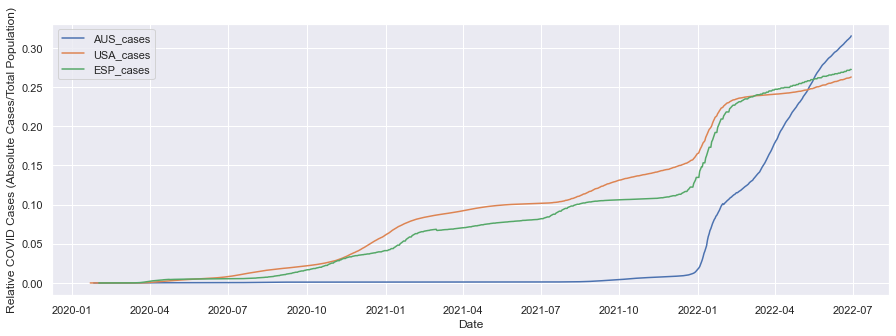

In [173]:
# Defining the size for plotting 
plt.figure(figsize=(15,5))
# plot for relative covid cases for Australia
plt.plot(Dataframe_final["date"], Dataframe_final["AUS_cases"], label = "AUS_cases")
# plot for relative covid cases for USA
plt.plot(Dataframe_final["date"], Dataframe_final["USA_cases"], label = "USA_cases")
# plot for relative covid cases for Spain
plt.plot(Dataframe_final["date"], Dataframe_final["ESP_cases"], label = "ESP_cases")
# Add X-label for date
plt.xlabel('Date')
# Add Y-label for relative covid cases 
plt.ylabel('Relative COVID Cases (Absolute Cases/Total Population)')
# Add legend
plt.legend()
# Display Plot
plt.show()